<a href="https://colab.research.google.com/github/kawthar-mohammed/Usecase-5/blob/main/usecase_5_kawthar_mohammed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

We are interested in understanding the employment landscape within Saudi Arabia. We would like to know:
1. What proportion of job postings is attributed to each region within the kingdom?
2. Is there a gender preference indicated in the job postings?
3. What is the expected salary range for fresh graduates?
4. Are job opportunities predominantly targeted at individuals with experience, or
is there room for fresh graduates as well?

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [ ]:
#Read in the csv file and convert to a Pandas dataframe
Jadarat_data = pd.read_csv('Jadarat_data.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [ ]:
Jadarat_data

job_title    job_date  \
0                         محاسب  27/05/1444   
1                          بائع  27/05/1444   
2     أخصائي عمليات موارد بشرية  27/05/1444   
3               ميكانيكي سيارات  27/05/1444   
4                         محاسب  27/05/1444   
...                         ...         ...   
1465        مهندس تقنية معلومات  19/06/1444   
1466                     سكرتير  19/06/1444   
1467                      صيدلي  18/06/1444   
1468        مشغل آلة تشطيب رخام  18/06/1444   
1469                      صيدلي  18/06/1444   

                                               job_desc  \
0     ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
1     ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
2     ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...   
3     ['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...   
4     ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
...                                                 ...   
1465  ['دراسة احتياجات العميل من الأجهزة الحاسوبية و...   
1466  ['دعم المدير أو الإدارة من خلال كتابة الوثائق ...   
1467  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   
1468  ['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...   
1469  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   

                                              job_tasks  \
0     ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
1     ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
2     ['   تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...   
3     ['   فحص أداء المعدّات الكهربائية والميكانيكية...   
4     ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
...                                                 ...   
1465  ['   متابعة وتقييم عملية جمع وتحليل المعطيات و...   
1466  ['   تدوين الملاحظات، التي يتم إملاؤها، بطريقة...   
1467  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   
1468  ['   تسوية الرخام بواسطة أقراص الألماس الحديدي...   
1469  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   

                                              comp_name     comp_no comp_type  \
0                              شركة مقر العالم للسفريات    1-317262       خاص   
1                          شركة عالم الكهرباء للمقاولات   4-1324428       خاص   
2                                       شركه دار السلام    1-155294       خاص   
3                               مؤسسة لمكو لغيار الزيوت   8-1925495       خاص   
4                          مؤسسة فكرة اليمامة للمقاولات   1-2356639       خاص   
...                                                 ...         ...       ...   
1465                  مطعم الاوراق الخضر لتقديم الوجبات  15-1698448       خاص   
1466         شركة ملتقى التجار لحاضنات و مسرعات الأعمال   9-2013930       خاص   
1467                شركة تقنية الدواجن والألبان للتجارة   1-2415250       خاص   
1468  مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...  15-1971895       خاص   
1469                شركة تقنية الدواجن والألبان للتجارة   1-2415250       خاص   

         comp_size                                       eco_activity  \
0     متوسطة فئة أ                        أنشطة وكالات السياحة والسفر   
1     متوسطة فئة ب  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...   
2     متوسطة فئة أ               ترميمات المباني السكنية والغير سكنية   
3      صغيرة فئة ب                                                NaN   
4            كبيرة                   الإنشاءات العامة للمباني السكنية   
...            ...                                                ...   
1465   صغيرة فئة ب                                  المطاعم مع الخدمة   
1466   صغيرة فئة ب                       أنشطة حاضنات ومسرعات الأعمال   
1467   صغيرة فئة ب                                                NaN   
1468   صغيرة فئة أ                                                NaN   
1469   صغيرة فئة ب                                                NaN   

                                                 qualif           region  \
0        ['Language data', 'اللغة الانجليزية', 'محترف']           الرياض   
1                                    

In [ ]:
Jadarat_data.shape

(1470, 18)

In [ ]:
Jadarat_data.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id', 'exper',
       'gender'],
      dtype='object')

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data.

In [ ]:
Jadarat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     1470 non-null   object
 1   job_date      1470 non-null   object
 2   job_desc      1470 non-null   object
 3   job_tasks     1470 non-null   object
 4   comp_name     1470 non-null   object
 5   comp_no       1470 non-null   object
 6   comp_type     1470 non-null   object
 7   comp_size     1456 non-null   object
 8   eco_activity  1380 non-null   object
 9   qualif        780 non-null    object
 10  region        1470 non-null   object
 11  city          1470 non-null   object
 12  benefits      1470 non-null   object
 13  contract      1470 non-null   object
 14  positions     1470 non-null   object
 15  job_post_id   1470 non-null   int64 
 16  exper         1470 non-null   object
 17  gender        1470 non-null   object
dtypes: int64(1), object(17)
memory usage: 206.8+ KB


In [ ]:
Jadarat_data.describe(include = 'object')

job_title    job_date  \
count       1470        1470   
unique       324          92   
top         بائع  09/06/1444   
freq          98          47   

                                                 job_desc  \
count                                                1470   
unique                                                438   
top     ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
freq                                                   93   

                                                job_tasks  \
count                                                1470   
unique                                                444   
top     ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
freq                                                   90   

                                                comp_name   comp_no comp_type  \
count                                                1470      1470      1470   
unique                                                886       894         2   
top     شركه العرض المتقن للخدمات التجارية شركة مساهمة...  1-169123       خاص   
freq                                                   16        16      1465   

          comp_size       eco_activity  \
count          1456               1380   
unique            7                361   
top     صغيرة فئة ب  المطاعم مع الخدمة   
freq            635                 65   

                                          qualif  region          city  \
count                                        780    1470          1470   
unique                                       615      14           114   
top     ['Language data', 'الانجليزية', 'متوسط']  الرياض  AR RIYADH...   
freq                                          28     622           523   

                    benefits   contract positions    exper gender  
count                   1470       1470      1470     1470   1470  
unique                   393          2        25        6      3  
top     ['Salary', '4000.0']  دوام كامل     0 / 1  0 Years   both  
freq                     449       1448       853      833    587

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable.


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

the dataset is from reliable data source

#### 2. Timeliness:
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

the dataset collected in 2022 as what is written in kaggle.

#### 3. Consistency:

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


we have only one dataset, and it is consistent

#### 4. Relevance:
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


the data sample is appropriate for analysis objective.
for variable selection there are many columns that are not relevent to analysis objective but I will not delete them.

#### 5. Uniqueness:
Check for and remove duplicate records to prevent skewed analysis results.


In [ ]:
Jadarat_data[Jadarat_data.duplicated(keep = False)]


job_title    job_date                                           job_desc  \
1467     صيدلي  18/06/1444  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   
1469     صيدلي  18/06/1444  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   

                                              job_tasks  \
1467  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   
1469  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   

                                comp_name    comp_no comp_type    comp_size  \
1467  شركة تقنية الدواجن والألبان للتجارة  1-2415250       خاص  صغيرة فئة ب   
1469  شركة تقنية الدواجن والألبان للتجارة  1-2415250       خاص  صغيرة فئة ب   

     eco_activity                                             qualif  region  \
1467          NaN  ['Professional certificate \\ License data', '...  الرياض   
1469          NaN  ['Professional certificate \\ License data', '...  الرياض   

              city              benefits   contract positions     job_post_id  \
1467  AR RIYADH...  ['Salary', '7000.0']  دوام كامل     0 / 1  20202026399061   
1469  AR RIYADH...  ['Salary', '7000.0']  دوام كامل     0 / 1  20202026399061   

        exper gender  
1467  0 Years   both  
1469  0 Years   both

In [ ]:
# go to delete duplicates columns

#### 6. Completeness:
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [ ]:
#Display number missing values per column
Jadarat_data.isnull().sum().sort_values(ascending = False)


qualif          690
eco_activity     90
comp_size        14
region            0
exper             0
job_post_id       0
positions         0
contract          0
benefits          0
city              0
job_title         0
job_date          0
comp_type         0
comp_no           0
comp_name         0
job_tasks         0
job_desc          0
gender            0
dtype: int64

In [ ]:
!pip install ydata-profiling


In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(Jadarat_data, title="Jadarat Data Profiling Report")

profile.to_notebook_iframe()
profile.to_file("jadarat_data_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# go to clean them

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [ ]:
# check columns types
Jadarat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     1470 non-null   object
 1   job_date      1470 non-null   object
 2   job_desc      1470 non-null   object
 3   job_tasks     1470 non-null   object
 4   comp_name     1470 non-null   object
 5   comp_no       1470 non-null   object
 6   comp_type     1470 non-null   object
 7   comp_size     1456 non-null   object
 8   eco_activity  1380 non-null   object
 9   qualif        780 non-null    object
 10  region        1470 non-null   object
 11  city          1470 non-null   object
 12  benefits      1470 non-null   object
 13  contract      1470 non-null   object
 14  positions     1470 non-null   object
 15  job_post_id   1470 non-null   int64 
 16  exper         1470 non-null   object
 17  gender        1470 non-null   object
dtypes: int64(1), object(17)
memory usage: 206.8+ KB


In [ ]:
# for benefits columns it should be int,but it show other info rather than salary so it should be a column for salary for analysis objective.
Jadarat_data['benefits'].unique()


array(["['Salary', '5000.0']", "['Salary', '4000.0']",
       "['Salary', '4500.0']", "['Salary', '6000.0']",
       "['Salary', '8000.0']", "['Salary', '10000.0']",
       "['Salary', '7200.0', 'Benefits', 'بدل نقل 800 ريال']",
       "['Salary', '7000.0']", "['Salary', '3000.0']",
       "['Salary', '9000.0']", "['Salary', '12000.0']",
       "['Salary', '5500.0']", "['Salary', '8400.0']",
       "['Salary', '4000.0', 'Benefits', '500']",
       "['Salary', '4000.0', 'Benefits', '2000']",
       "['Salary', '4000.0', 'Benefits', 'تأمين طبي حسب نظام مكتب العمل']",
       "['Salary', '4000.0', 'Benefits', '1000 حسب الخبره']",
       "['Salary', '4000.0', 'Benefits', '4000 SR']",
       "['Salary', '3200.0', 'Benefits', '3200 ريال']",
       "['Salary', '5000.0', 'Benefits', '500 بدل نقل و500 بدل سكن وتامين طبي']",
       "['Salary', '4500.0', 'Benefits', 'حسب سنوات الخبرة']",
       "['Salary', '4500.0', 'Benefits', 'تارقت شهري', 'بونص سنوي']",
       "['Salary', '4500.0', 'Benefits', 

In [ ]:
# go to clean them

In [ ]:
# check outliers

**What is an Outlier?**
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR

![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [ ]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [ ]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics

In [ ]:
# go to delete ouliers

## 2. Data Cleaning:

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

In [ ]:
Jadarat_data.isnull().sum().sort_values(ascending = False)

qualif          690
eco_activity     90
comp_size        14
region            0
exper             0
job_post_id       0
positions         0
contract          0
benefits          0
city              0
job_title         0
job_date          0
comp_type         0
comp_no           0
comp_name         0
job_tasks         0
job_desc          0
gender            0
dtype: int64

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [ ]:
#delete duplicated rows
Jadarat_data.drop_duplicates(inplace=True)

for Nan values of qualif column I will try to fill them with values of other simmiler data items.

In [ ]:
Jadarat_data['qualif'].isnull().value_counts()

qualif
False    779
True     690
Name: count, dtype: int64

In [ ]:
Jadarat_data['job_tasks'].value_counts()

job_tasks
['   بيع مجموعة من السلع والخدمات للعملاء.', '  توفير المعلومات المتعلقة بالمنتجات، والاستخدامات، والأسعار.', '  مراقبة مستويات المخزون والحفاظ على ترتيب المتجر، وإصدار طلبات لشراء المنتجات، والتعامل مع المنتجات الواردة.', '  تولي أمور الدفع وتلقي المدفوعات من العملاء، ومعالجة طلبات استبدال المنتجات، والمرتجعات وفقاً للسياسة المتبعة.', '  ', '  ']                                                                                                                                                                                                                                                                                                                                                                                   90
['   تدقيق المطالبات المالية والتأكد من اكتمال شروطها القانونية والمالية، وإعداد وتنظيم وتوثيق مستندات الصرف ومتابعة تدقيقها وإجازتها للصرف من الجهات الرقابية المعتمدة.', '  مراقبة النفقات الجارية والرأسمالية بحسب الموقف المالي الشهري لبنود الموازنة، وإعداد الموقف المالي والخلاصات الشهرية وإعداد وتنظيم الحسابات الختامية السنوية.', '  إعداد القيود المحاسبية وتسجيل العمليات المالية بالسجلات وتدقيق حسابات البنوك وإعداد التسويات اللازمة مع كشوف المطابقة الشهرية.', '  تطوير أساليب وإجراءات المحاسبة ومواكبة التطور العلمي والتقني في مجال المحاسبة.', '  إعداد الوثائق والتقارير المتخصصة في مجال محاسبة النفقات والإيرادات وحفظها في قاعدة البيانات الخاصة بذلك.', '  ']                                                        81
['   استقبال الزوار والعملاء والترحيب بهم وتحديد مطالبهم وتزويدهم بالمعلومات المطلوبة، وإعلام المرجع المعني عن المراجعين والعملاء وارشادهم اليه', '  استقبال المكالمات الهاتفية والرد على الاستفسارات او التحويل إلى المرجع المختص', '  إجراء الاتصالات الداخلية للحصول على المعلومات', '  ترتيب مواعيد المقابلات ,تسجيل اسماء المراجعين والعملاء في السجلات الخاصة بذلك', '  الالتزام التام بالأدلة الإجرائية وبالسياسات والإجراءات المنظمة والتقيد بها.', '  ']                                                                                                                                                                                                                                                                               44
['   تحديد الأهداف العامة والفرعية للتسويق وتطوير السياسات والخطط والبرامج والتسهيلات التسويقية، وتحليل دورة حياة المنتج وتحديد أسباب نجاح أو فشل تسويق المنتجات، وتحليل أسعار المنافسين، وتطوير سياسات الأسعار.', '  تحديد برامج الترويج، واختيار قنوات التوزيع وتقييم فاعلية الدعاية والإعلان.', '  وضع برنامج زمني لتنفيذ السياسات التسويقية، ومتابعة إجراءات تنفيذها وتقييم النتائج.', '  إجراء اختبارات للمنتجات الجديدة قبل طرحها في الأسواق بشكلها النهائي واستخدام برامج حاسوبية خاصة في مجال اختبارات السوق وبحسب متطلبات العمل.', '  إعداد الوثائق والتقارير المتخصصة والمتعلقة بالتسويق وتقديم التوصيات المناسبة والحلول الملائمة وعرضها وتوضيحها وحفظها في قاعدة البيانات الخاصة بها وفقاً للسياسات والإجراءات المعتمدة.', '  ']    44
['   تنفيذ التعليمات الادارية الصادرة عن الرئيس المباشر ومتابعة تنفيذ القرارات الادارية الصادرة عنه', '  فتح وفرز البريد الورقي وتوزيعه على المعنيين وفتح البريد الالكتروني والرد عليه بحسب توجيهات الرئيس المباشر', '  انجاز أعمال الطباعة والرد على الاستفسارات والمكالمات الهاتفية وتنظيم الملفات الخاصة', '  حفظ المعاملات والعناية بالملفات بأسلوب سلس يسهل عملية الرجوع إليها', '  تنسيق وتنظيم اجتماعات الرئيس المباشر واجتماعات موظفي الوحدة التنظيمية والمشاركة في هذه الاجتماعات و تدوين وتوثيق محاضرها، وطباعة وتوزيع محاضر الاجتماعات الخاصة بالرئيس المباشر للأطراف الأخرى المشاركة في الاجتماع.', '  ']                                                                                                                           42
                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:
''' I am filling null null values of column qualif with
 the values of other row where they have same job_title and job_tasks.'''

filter_3= Jadarat_data.groupby(['job_title','job_tasks'])
Jadarat_data['qualif'] = filter_3['qualif'].transform(lambda x: x.fillna(method='ffill'))
Jadarat_data['qualif'].isnull().value_counts()

<ipython-input-323-dc2ba248bb54>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Jadarat_data['qualif'] = filter_3['qualif'].transform(lambda x: x.fillna(method='ffill'))
<ipython-input-323-dc2ba248bb54>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Jadarat_data['qualif'] = filter_3['qualif'].transform(lambda x: x.fillna(method='ffill'))


qualif
False    1205
True      264
Name: count, dtype: int64

In [ ]:
Jadarat_data['job_desc'].value_counts()

job_desc
['بيع مجموعة من السلع والخدمات للعملاء، وتوفير المعلومات المتعلقة بالمنتجات واستخداماتها وأسعارها، وتولي أمور الدفع وتلقي المدفوعات من العملاء.']                                                                                                93
['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإيرادات وتوثيقها وتحليلها، وإعداد القيود المحاسبية وتسجيل العمليات المالية بالسجلات وتدقيق حسابات البنوك وإعداد التسويات اللازمة وإعداد التقارير والوثائق المتعلقة بالنفقات والإيرادات وحفظها.']    82
['تحديد الأهداف وتطوير السياسات التسويقية للسلع والخدمات، والإشراف على تنفيذها وتقييمها، وإجراء اختبارات السوق وإعداد الوثائق والتقارير المتخصصة والمتعلقة في مجال التسويق وعرضها وحفظها.']                                                      45
['متابعة تنفيذ القرارات الادارية الصادرة عن الرئيس المباشر وتنظيم أعمال البريد والمواعيد اليومية، وإنجاز الأعمال الادارية المتعلقة بسير العمل وتنسيق وتنظيم اجتماعات الرئيس المباشر']                                                            43
['استقبال الزوار والعملاء وتحديد مطالبهم وتوجيههم إلى المرجع المختص واستقبال المكالمات الهاتفية والرد على الاستفسارات او التحويل إلى المرجع المختص وحفظ السجلات الخاصة بالزوار']                                                                 42
                                                                                                                                                                                                                                                 ..
['أداء الواجبات الفنية المتعلقة بإنشاء الطرق،وجمع العينات من تربة المسار والمواد الإنشائية وإرسالها للمختبر، ومطابقة المواصفات، وتقدير كميات المواد والعمالة اللازمة .']                                                                          1
['تدريس طلاب مرحلة التعليم الابتدائي عدة موضوعات، بما في ذلك القراءة والكتابة والرياضيات، ووضع خطط الدروس، وإعطاء التعليمات الفردية والجماعية.']                                                                                                  1
['مساعدة الأطباء والممرضين في رعاية المرضى في المستشفيات وتطبيق إجراءات وتعليمات السلامة والصحة المهنيةوالعامة']                                                                                                                                  1
['فحص واختبار سلوك المواد تحت ظروف مختلفة، وتقديم التوصيات حول الاستخدامات العملية للمواد والبحث عن البدائل']                                                                                                                                     1
['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتفتفة وصقل وتنعيم  وجلي الرخام وتطبيق أسس وتعليمات السلامة والصحة المهنية']                                                                                                                           1
Name: count, Length: 438, dtype: int64

In [ ]:
''' I am filling null values of column qualif with
the values of other row where they have same job_title and job_desc.'''

filter_2= Jadarat_data.groupby(['job_title','job_desc'])
Jadarat_data['qualif'] = filter_2['qualif'].transform(lambda x: x.fillna(method='ffill'))
Jadarat_data['qualif'].isnull().value_counts()

<ipython-input-325-035f3d8d43e2>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Jadarat_data['qualif'] = filter_2['qualif'].transform(lambda x: x.fillna(method='ffill'))
<ipython-input-325-035f3d8d43e2>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Jadarat_data['qualif'] = filter_2['qualif'].transform(lambda x: x.fillna(method='ffill'))


qualif
False    1211
True      258
Name: count, dtype: int64

In [ ]:
 ''' here i consider the scenario where the same job_title and com_name with NAN Qualification that means the company does not have
spesfic Qualification for this position so I will fill the column with forword value '''

''' I am filling null values of column qualif with
the values of other row where they have same job_title and comp_name.'''

filter_1= Jadarat_data.groupby(['job_title','comp_name'])
Jadarat_data['qualif'] = filter_1['qualif'].transform(lambda x: x.fillna(method='ffill'))
Jadarat_data['qualif'].isnull().value_counts()

<ipython-input-326-dbfa85ad3865>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Jadarat_data['qualif'] = filter_1['qualif'].transform(lambda x: x.fillna(method='ffill'))
<ipython-input-326-dbfa85ad3865>:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Jadarat_data['qualif'] = filter_1['qualif'].transform(lambda x: x.fillna(method='ffill'))


qualif
False    1211
True      258
Name: count, dtype: int64

In [ ]:
 ''' here I consider the scenario where the same job_title with NAN Qualification that means the company does not have
spesfic Qualification for this position so I will fill the column with forword value '''

 ''' here I am filling null values of column qualif with
 the values of other row where they have same job_title.'''

filter_0 = Jadarat_data.groupby('job_title')
Jadarat_data['qualif'] = filter_0['qualif'].transform(lambda x: x.fillna(method='ffill'))
Jadarat_data['qualif'].isnull().value_counts()

<ipython-input-327-317c8f1b2167>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Jadarat_data['qualif'] = filter_0['qualif'].transform(lambda x: x.fillna(method='ffill'))
<ipython-input-327-317c8f1b2167>:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Jadarat_data['qualif'] = filter_0['qualif'].transform(lambda x: x.fillna(method='ffill'))


qualif
False    1243
True      226
Name: count, dtype: int64

In [ ]:
# filling the remaining null values
Jadarat_data['qualif'].fillna('غير محدد', inplace=True)


<ipython-input-329-153138a2b622>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Jadarat_data['qualif'].fillna('غير محدد', inplace=True)


In [ ]:
'''  I am filling  null values of column eco_activity with
 the values of other row where they have same comp_name.'''

filter_5 = Jadarat_data.groupby('comp_name')
Jadarat_data['eco_activity'] = filter_5['eco_activity'].transform(lambda x: x.fillna(method='ffill'))
Jadarat_data['eco_activity'].isnull().value_counts()

<ipython-input-330-ac597b1ed80c>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Jadarat_data['eco_activity'] = filter_5['eco_activity'].transform(lambda x: x.fillna(method='ffill'))
<ipython-input-330-ac597b1ed80c>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Jadarat_data['eco_activity'] = filter_5['eco_activity'].transform(lambda x: x.fillna(method='ffill'))


eco_activity
False    1392
True       77
Name: count, dtype: int64

In [ ]:
# filling the remaining null values
Jadarat_data['eco_activity'].fillna('غير محدد', inplace=True)

<ipython-input-331-1a0a008d64c5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Jadarat_data['eco_activity'].fillna('غير محدد', inplace=True)


In [ ]:
# ''' here i am tring to fill null values of column comp_size with
#  the values of other row where they have same comp_name, but it does not make change'''
#Jadarat_data.groupby('comp_name')['comp_size'].transform(lambda x: x.fillna(method='ffill'))

Jadarat_data['comp_size'].fillna('غير محدد', inplace=True)

<ipython-input-336-0d642ac46bc2>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Jadarat_data['comp_size'].fillna('غير محدد', inplace=True)


In [ ]:
Jadarat_data.isnull().sum().sort_values(ascending = False)

job_title       0
job_date        0
exper           0
job_post_id     0
positions       0
contract        0
benefits        0
city            0
region          0
qualif          0
eco_activity    0
comp_size       0
comp_type       0
comp_no         0
comp_name       0
job_tasks       0
job_desc        0
gender          0
dtype: int64

In [ ]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [ ]:
# go back to 7th dimension Accuracy

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis:

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [ ]:
all(isinstance(x, (str)) for x in Jadarat_data['benefits'])

True

In [ ]:
import ast

Jadarat_data['benefits'] = Jadarat_data['benefits'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)

In [ ]:
type(Jadarat_data['benefits'][0])

list

In [ ]:
Jadarat_data['benefits'].value_counts()

benefits
[Salary, 4000.0]                                             449
[Salary, 5000.0]                                             148
[Salary, 6000.0]                                              86
[Salary, 4500.0]                                              85
[Salary, 7000.0]                                              65
                                                            ... 
[Salary, 4600.0]                                               1
[Salary, 10000.0, Benefits, راتب أساسي فقط]                    1
[Salary, 5000.0, Benefits, عمولة مستهدفة من ارباح الفرع ]      1
[Salary, 5500.0, Benefits, راتب أساسي بدون بدلات]              1
[Salary, 4000.0, Benefits, اجازة سنوية 30 يوم ]                1
Name: count, Length: 393, dtype: int64

In [ ]:
Jadarat_data['salary'] = Jadarat_data['benefits'].apply(lambda x :x[1])
#Jadarat_data['salary'].apply(lambda x: x is None).sum()



In [ ]:
Jadarat_data['salary']=Jadarat_data['salary'].astype(float)


In [ ]:
Jadarat_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1469 entries, 0 to 1468
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   job_title     1469 non-null   object 
 1   job_date      1469 non-null   object 
 2   job_desc      1469 non-null   object 
 3   job_tasks     1469 non-null   object 
 4   comp_name     1469 non-null   object 
 5   comp_no       1469 non-null   object 
 6   comp_type     1469 non-null   object 
 7   comp_size     1469 non-null   object 
 8   eco_activity  1469 non-null   object 
 9   qualif        1469 non-null   object 
 10  region        1469 non-null   object 
 11  city          1469 non-null   object 
 12  benefits      1469 non-null   object 
 13  contract      1469 non-null   object 
 14  positions     1469 non-null   object 
 15  job_post_id   1469 non-null   int64  
 16  exper         1469 non-null   object 
 17  gender        1469 non-null   object 
 18  salary        1469 non-null   flo

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis:

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart|


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

###1. What proportion of job postings is attributed to each region within the kingdom?

In [ ]:
!pip install arabic_reshaper python-bidi

import arabic_reshaper
from bidi.algorithm import get_display


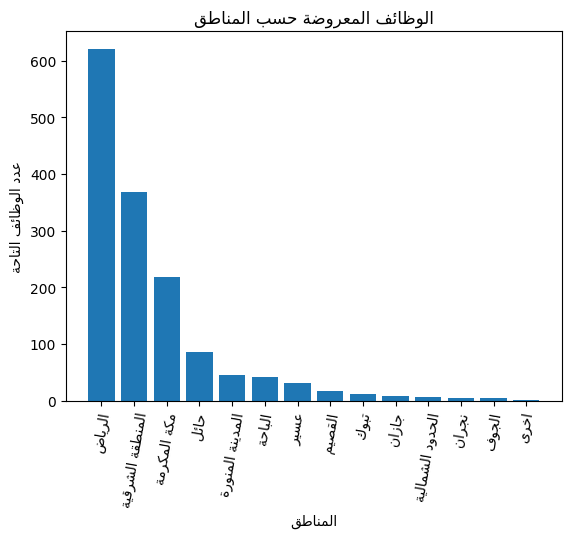

In [ ]:
!pip install arabic_reshaper python-bidi

import arabic_reshaper
from bidi.algorithm import get_display
region = Jadarat_data['region'].unique()
region_counts = Jadarat_data['region'].value_counts()

# Reshape Arabic text for x-axis labels
reshaped_regions = [get_display(arabic_reshaper.reshape(item)) for item in region]


plt.bar(reshaped_regions, region_counts)
plt.xticks(rotation=80)


plt.xlabel(get_display(arabic_reshaper.reshape("المناطق")))
plt.ylabel(get_display(arabic_reshaper.reshape("عدد الوظائف التاحة")))
plt.title(get_display(arabic_reshaper.reshape("الوظائف المعروضة حسب المناطق")))


plt.show();

### 2. Is there a gender preference indicated in the job postings?

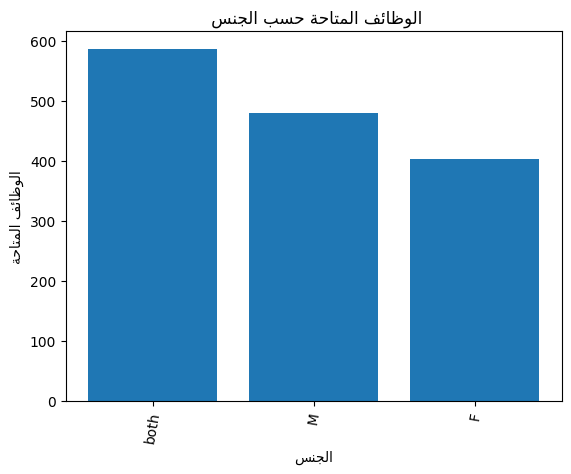

In [ ]:
region = Jadarat_data['gender'].unique()
region_counts = Jadarat_data['gender'].value_counts()

# Reshape Arabic text for x-axis labels
reshaped_regions = [get_display(arabic_reshaper.reshape(item)) for item in region]


plt.bar(reshaped_regions, region_counts)
plt.xticks(rotation=80)


plt.xlabel(get_display(arabic_reshaper.reshape("الجنس")))
plt.ylabel(get_display(arabic_reshaper.reshape('الوظائف المتاحة')))
plt.title(get_display(arabic_reshaper.reshape('الوظائف المتاحة حسب الجنس ')))


plt.show();

###3. What is the expected salary range for fresh graduates?

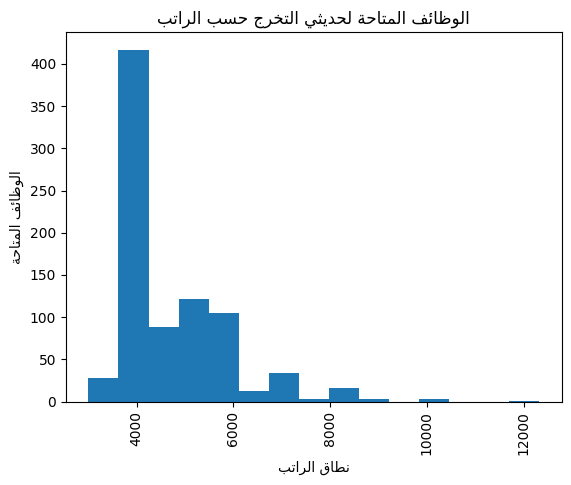

In [ ]:
subset_1=Jadarat_data[Jadarat_data['exper']=='0 Years']


plt.hist(subset_1['salary'].sort_values(), bins=15)
plt.xticks(rotation=90)


plt.xlabel(get_display(arabic_reshaper.reshape("نطاق الراتب")))
plt.ylabel(get_display(arabic_reshaper.reshape('الوظائف المتاحة')))
plt.title(get_display(arabic_reshaper.reshape('الوظائف المتاحة لحديثي التخرج حسب الراتب')))


plt.show();

 ### 4. Are job opportunities predominantly targeted at individuals with experience, or is there room for fresh graduates as well?

Text(0.5, 1.0, 'ﺓﺮﺒﺨﻟﺍ ﺐﺴﺣ ﺔﺿﻭﺮﻌﻤﻟﺍ ﻒﺋﺎﻇﻮﻟﺍ')

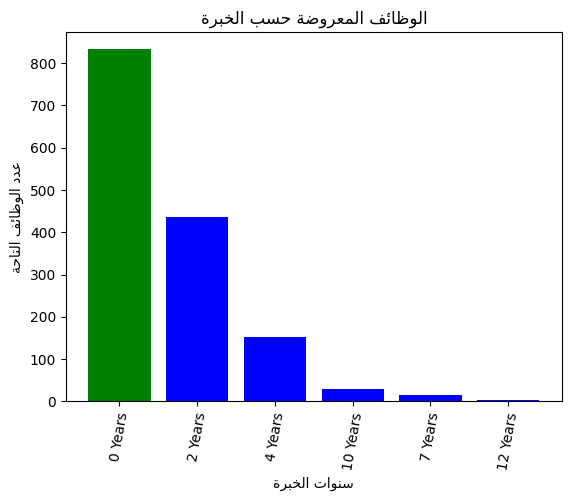

In [ ]:

exper_labels = Jadarat_data['exper'].unique()
exper_counts = Jadarat_data['exper'].value_counts()

colors = ['green' if label == '0 Years' else 'blue' for label in exper_labels]

plt.bar(exper_labels, exper_counts, color=colors)
plt.xticks(rotation=80)
# plt.bar(Jadarat_data['exper'].unique(), Jadarat_data['exper'].value_counts(),
#         color=['green' if Jadarat_data['exper'].unique()== ('0 Years') else 'blue'])
# plt.xticks(rotation=80)


plt.xlabel(get_display(arabic_reshaper.reshape("سنوات الخبرة")))
plt.ylabel(get_display(arabic_reshaper.reshape("عدد الوظائف التاحة")))
plt.title(get_display(arabic_reshaper.reshape("الوظائف المعروضة حسب الخبرة")))